In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.neural_network import MLPClassifier
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
survivors_count = train_df[train_df['Survived'] == 1]['Survived'].count()
victims_count = train_df[train_df['Survived'] == 0]['Survived'].count()

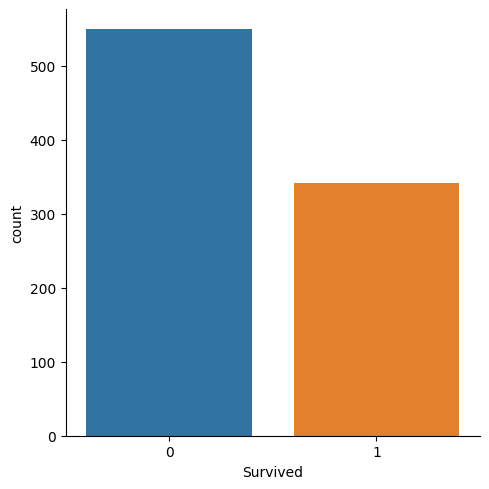

In [4]:
sns.catplot(train_df, x='Survived', kind='count')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
label_encoder = LabelEncoder()

In [7]:
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex']) 
train_df['Ticket'] = label_encoder.fit_transform(train_df['Ticket']) 
train_df['Cabin'] = label_encoder.fit_transform(train_df['Cabin']) 
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked']) 

test_df['Sex'] = label_encoder.fit_transform(test_df['Sex']) 
test_df['Ticket'] = label_encoder.fit_transform(test_df['Ticket']) 
test_df['Cabin'] = label_encoder.fit_transform(test_df['Cabin']) 
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked']) 

In [8]:
train_df = train_df.dropna()
test_df = test_df.dropna()

# Raw data classification
First I will run all the classifiers with the raw data to further prove that scaling and preprocessing the data we can obtain better results

## KNN Classifier

In [9]:
train_df_Y = train_df['Survived']
train_df_X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


test_df_X = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [10]:
KNNclassifier = KNeighborsClassifier(n_neighbors=3)

In [11]:
KNNclassifier.fit(train_df_X, train_df_Y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
KNNclassifier.score(train_df_X, train_df_Y)

0.8319327731092437

In [13]:
knn_predict = KNNclassifier.predict(test_df_X)

In [14]:
knn_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## SVM Classifier

For Support Vector Classifiers it is important to know the structure of the data. The configuration of the SVC depends in the data structure, wether the data is linearly or non-linearly separable is important for the configuration choices.
We can use PCA in order to make a 2D visualization that will help us to understand the data structure visually.

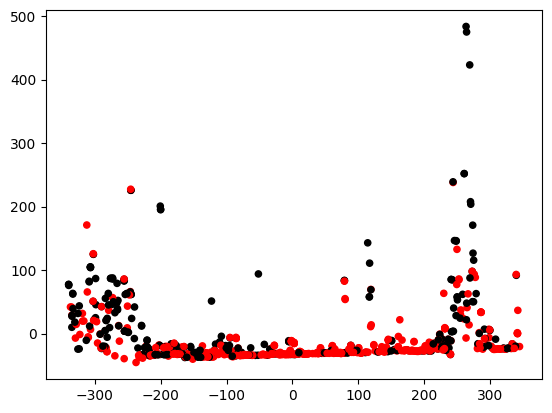

In [15]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(train_df_X), columns=["comp1", "comp2"])

colors = np.where(train_df_Y > 0, 'k', 'r')
plt.scatter(reduced_X['comp1'], reduced_X['comp2'], s=20, c=colors)

What we did was to reduce the features dimensionality to 2 components and paint them in the scatter plot based on wether they survived or not.
**As we can see, the data seems to be non-linear which in practice suggests that it would be better to use non-linear kernels such as RBF**

In [16]:
svm = SVC()
svm_result = svm.fit(train_df_X, train_df_Y)
svm_result.score(train_df_X, train_df_Y)

0.6778711484593838

In [17]:
svm_predict = svm_result.predict(test_df_X)

## SGD
Stochastic Gradient Descent is an algorithm based on gradient descent learning, this is, iterate through the labeled data and updating the model weights ind order to reach an optimal value that minimizes a defined loss function. For learning purposes we will implement it but in practice with a hinge loss it is equivalent to a SVM algorithm as the sklearn documentation specifies: https://scikit-learn.org/stable/modules/sgd.html#classification

In [18]:
sgd = SGDClassifier(loss='hinge', penalty='l2')
sgd_fit = sgd.fit(train_df_X, train_df_Y)
sgd_fit.score(train_df_X, train_df_Y)

0.6638655462184874

In [19]:
sgd_results = sgd_fit.predict(test_df_X)
sgd_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

As we can see, the accuracy is nearly 50% which means that the classifier is kind to toss a coin to decide the result, this is because the problem is non-linear while the classifier is linear, it even behaves worst than SVM since SVM used RBF kernel which is appropiate for non-linear data

## Decision Tree
Decision tree's classifiers use if-then-else sequential question on the dataset in order to gain general knowledge about the data distribution, being a non-linear algorithm, is more suitable for our problem.

In [20]:
dt = tree.DecisionTreeClassifier()
fit_tree = dt.fit(train_df_X, train_df_Y)
dt.score(train_df_X, train_df_Y)

1.0

In [21]:
dt.predict(test_df_X)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,

We can see that the decision tree gets 100% accuracy, something rare, and probably indicating that the tree is overfitting the data, in any case seems to be the algorith that achieves the best result

## Random Forest
Random forest basically is a collection of decison trees that throw results and the random forest try to mix the result and get the better output.

In [22]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(train_df_X, train_df_Y)
rfc_fit.score(train_df_X, train_df_Y)

1.0

In [23]:
rfc_fit.predict(test_df_X)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

## Neural Network
Neural networks is the mainstream in machine learning, its a composition of functions separated in layers which interconnect using a layer output as input for the next layer, in the final layer can use an activation function to output a result, in the binary case we want to use sigmoid function which will always output a number between 0 and 1.

We will use pytorch as deep learning framework

In [30]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [31]:
total_samples = train_df_X.shape[0]
train_split = int(0.7 * total_samples)
dev_split = total_samples - train_split

In [32]:
X_train = torch.tensor(train_df_X[:train_split].values)
Y_train = torch.tensor(train_df_Y[:train_split].values).float()
X_dev = torch.tensor(train_df_X[dev_split:].values)
Y_dev = torch.tensor(train_df_Y[dev_split:].values).float()

In [33]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(9, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.net(input)

In [34]:
def train(x, y, model, optimizer, loss_fn):
    model.train()

    loss_acum = 0
    for i in range(len(x)):
        pred = model(x[i].float())
        label = torch.tensor([y[i]]).float()

        loss = loss_fn(pred, label)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()

        loss_acum += loss.item()

    avg_loss = loss_acum / len(x)
    return loss_acum, avg_loss

In [43]:
def test(x, y, model, loss_fn):
    model.eval()

    loss_acum = 0
    correct = 0
    with torch.no_grad():
        for i in range(len(x)):
            pred = model(x[i].float())
            true_label = torch.tensor([y[i]]).float()

            test_loss = loss_fn(pred, true_label)
            loss_acum += test_loss.item()
            if pred.round() == true_label:
                correct += 1

    avg_loss = loss_acum / len(x)
    accuracy = correct / len(x)

    return avg_loss, accuracy

In [44]:
model = SimpleNet().to(device)
print(model)

loss_fn = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=0.001)

for i in range(1000):
    
    loss_acum, avg_loss = train(X_train, Y_train, model, optimizer, loss_fn)
    test_loss, acc = test(X_dev, Y_dev, model, loss_fn)
    if i % 20 == 0:
        print(f"epoch {i} " + "="*70)    
        print(f"Train acumulated loss: {loss_acum} -- Train average loss: {avg_loss}")
        print(f"Test loss: {test_loss} -- Test accuracy: {acc}")

SimpleNet(
  (net): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
epoch 0 ======================================================================
Train acumulated loss: 380.84296419444945 -- Train average loss: 0.7632123530950891
Test loss: 0.6059394668608545 -- Test accuracy: 0.6833667334669339
epoch 20 ======================================================================
Train acumulated loss: 306.3242387017235 -- Train average loss: 0.6138762298631734
Test loss: 0.5540448429879444 -- Test accuracy: 0.7274549098196392
epoch 40 ======================================================================
Train acumulated loss: 296.5579459247383 -- Train average loss: 0.5943045008511789
Test loss: 0.5817946481257716 --

## Neural net results
We can see that the most basic neural net implementation (no batch training nor regularization nor complex layers) can achieve a 78% accuracy on data never seen by the network

# Data Normalization
We have seen the result for practically the raw data. It is common in machine learning to standardize and normalize inputs. Normalizing helps with the scale of the input, all features should be in the same scale (something like "play with the same rules"). All different models use maths to extract pattern and predictions from the input data, this operations can be heavily distorsionated if the inputs are not in the same scale. It is the model who with training should update parameters in order to assign weights to different features.